# pYIN による基本周波数推定
Mauch, Matthias, and Simon Dixon, “pYIN: A fundamental frequency estimator using probabilistic threshold distributions,” 
2014 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP). IEEE, 2014.
https://ieeexplore.ieee.org/document/6853678

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

In [2]:
IN_WAVE_FILE = "in.wav"

FRAME_LENGTH = 1024  # フレーム長 (FFTサイズ)
HOP_LENGTH = 80  # フレームのシフト長

In [3]:
MAX_Fo = 200  # 分析における基本周波数の最大値 (Hz)
MIN_Fo = 60  # 分析における基本周波数の最小値 (Hz)

## Probabilistic YINアルゴリズムに基づく基本周波数推定

In [4]:
# 音声のロード
fs, data = wavfile.read(IN_WAVE_FILE)
data = data.astype(np.float64)

In [5]:
# 基本周波数の推定
fo, _, _ = librosa.pyin(
    data,
    fmin=MIN_Fo,
    fmax=MAX_Fo,
    sr=fs,
    frame_length=FRAME_LENGTH,
    hop_length=HOP_LENGTH,
    fill_na=0.0,
)

## 波形および基本周波数系列の表示
後ろのほうのフレーム（1.0秒付近）で推定結果が0になっているのは、無声音のため

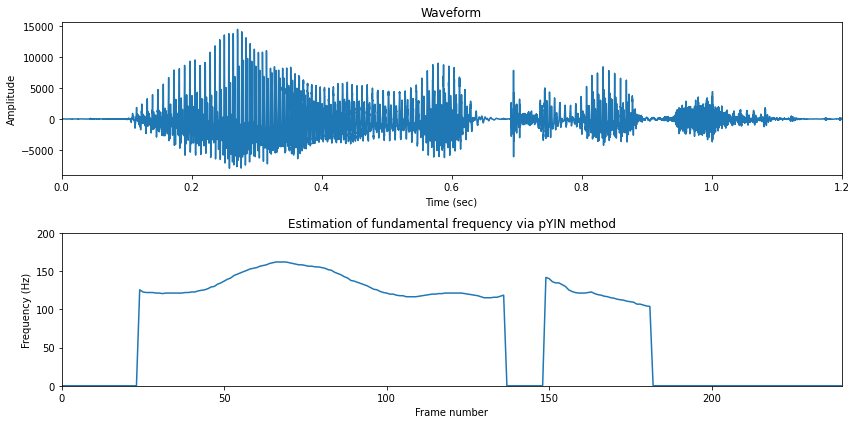

In [6]:
# 波形と基本周波数系列の表示
fig = plt.figure(figsize=(12, 6))
n_samples = len(data)
time = np.arange(n_samples) / fs
axes = fig.add_subplot(2, 1, 1)
axes.plot(time, data)
axes.set_xlabel("Time (sec)")
axes.set_ylabel("Amplitude")
axes.set_title("Waveform")
axes.set_xlim(0, np.max(time))

axes = fig.add_subplot(2, 1, 2)
axes.plot(fo)
axes.set_xlabel("Frame number")
axes.set_ylabel("Frequency (Hz)")
axes.set_title("Estimation of fundamental frequency via pYIN method")
axes.set_xlim(0, len(fo) - 1)
axes.set_ylim(0, MAX_Fo)

plt.tight_layout()
plt.show()